# PRÁCTICA FINAL 

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('airbnb_listings_extract.csv', sep = ";")
df.columns = df.columns.str.lower()
df = df.rename(columns=lambda x: x.replace(' ', '_'))
df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,cancellation_policy,calculated_host_listings_count,reviews_per_month,geolocation,features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14775,2098030,https://www.airbnb.com/rooms/2098030,20170502132028,2017-05-02,Spring into Bed Stuy!,"Sometimes I rent as a host (I'm here, guest st...","Simple, clean, modern one-bedroom in beautiful...","Sometimes I rent as a host (I'm here, guest st...",none,"There are plenty of restaurants, bars and othe...",...,10.0,9.0,10.0,NaN,NaN,strict,1.0,0.74,"40.67894535,-73.9393421856","Host Is Superhost,Host Has Profile Pic,Host Id..."
14776,17989442,https://www.airbnb.com/rooms/17989442,20170404145355,2017-04-06,"Paris 15 - Chambre cosy , near Eiffel tower",Paris- 15 -Résidence privée(code & gardien). Q...,"J'ai vécu au Canada, à Londres ,Madrid J'ai v...",Paris- 15 -Résidence privée(code & gardien). Q...,none,Quartier agréable par son côté résidentiel et ...,...,NaN,NaN,NaN,NaN,Paris,flexible,1.0,NaN,"48.8361969404,2.29404476423","Host Has Profile Pic,Is Location Exact,Instant..."
14777,13278634,https://www.airbnb.com/rooms/13278634,20170404145355,2017-04-05,Cozy Appartment Paris Batignolles,Cozy 2 bedroom apartment in core of Batignoles...,Very functional apartment in one of the most c...,Very functional apartment in one of the most c...,none,One of the most beautiful neighborhoods in Par...,...,10.0,10.0,10.0,NaN,NaN,strict,1.0,2.63,"48.8888092157,2.31617315267","Host Is Superhost,Host Has Profile Pic,Host Id..."
14778,10733941,https://www.airbnb.com/rooms/10733941,20160516142622,2016-05-18,City Pa

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14780 non-null  int64  
 1   listing_url                     14780 non-null  object 
 2   scrape_id                       14780 non-null  int64  
 3   last_scraped                    14780 non-null  object 
 4   name                            14779 non-null  object 
 5   summary                         14189 non-null  object 
 6   space                           10888 non-null  object 
 7   description                     14774 non-null  object 
 8   experiences_offered             14780 non-null  object 
 9   neighborhood_overview           9134 non-null   object 
 10  notes                           5644 non-null   object 
 11  transit                         9066 non-null   object 
 12  access                          

In [4]:
# nulos
(df.isnull().sum() / len(df) * 100).sort_values(ascending = False)

has_availability        99.918809
host_acceptance_rate    99.736130
jurisdiction_names      98.464141
license                 97.638701
square_feet             95.953992
                          ...    
minimum_nights           0.000000
extra_people             0.000000
guests_included          0.000000
room_type                0.000000
id                       0.000000
Length: 89, dtype: float64

In [5]:
df.drop(['has_availability', 'host_acceptance_rate', 'jurisdiction_names', 'license', 'square_feet', 
        'id', 'listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url', 'medium_url', 
    'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'name',
    'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'calendar_last_scraped', 
    'host_location', 'host_verifications', 'interaction', 'notes',
    'neighborhood_overview', 'access', 'transit', 
    'street', 'neighbourhood_cleansed', 'zipcode', 'smart_location', 'city'], axis = 1, inplace = True)

In [6]:
def calculate_mean(df, by, on, m):
    mean = df[on].mean()
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']
    smooth = (counts * means + m * mean) / (counts + m)
    return df[by].map(smooth)

for c in ['neighbourhood', 'neighbourhood_group_cleansed', 'country_code']:
    df[c] = calculate_mean(df, by=c, on='price', m=300).fillna(0)

In [7]:
now = datetime.now()
for i in ['host_since', 'first_review', 'last_review']: 
    df[i] = pd.to_datetime(df[i])
    df[i] = (now - df[i]).dt.days
    df[i] = df[i].fillna(0)


In [8]:
## Sustituir el valor nulo de estas columnas por 0
df = df.fillna(0)

In [9]:
## ya no hay nulos
print((df.isnull().sum() / len(df) * 100).sort_values(ascending = False).head())

summary             0.0
space               0.0
security_deposit    0.0
cleaning_fee        0.0
guests_included     0.0
dtype: float64


# Análisis descriptivo

In [10]:
## Variables categoricas y float
list_categorical = []
lista_float = []
for i in df.columns:
    if (df[i].dtype==float or df[i].dtype=='int64'):
        lista_float.append(i)
    elif (df[i].dtype==object):
        list_categorical.append(i)

In [13]:
print(len(list_categorical))
print(len(lista_float))

18
38


In [14]:
## se puede hacer igual q conn country con mas columnas categoricas...

<Figure size 1000x500 with 0 Axes>

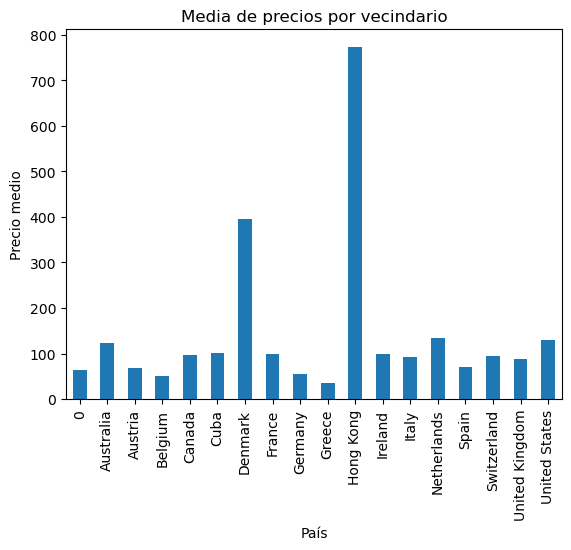

In [15]:
country=df[['country','price']].groupby('country').mean('Price')
plt.figure(figsize=(10, 5))
country.plot(kind='bar', legend=None)
plt.title('Media de precios por vecindario')
plt.xlabel('País')
plt.ylabel('Precio medio')
plt.xticks(rotation=90)
plt.show()

In [19]:
df.columns

Index(['summary', 'space', 'description', 'experiences_offered', 'house_rules',
       'host_since', 'host_about', 'host_response_time', 'host_response_rate',
       'host_listings_count', 'host_total_listings_count', 'neighbourhood',
       'neighbourhood_group_cleansed', 'state', 'market', 'country_code',
       'country', 'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_

## Análisis gráfico de algunas variables

In [20]:
def analyze_column(column, target_column=None):
    distinct_values = column.nunique()
    column_info = f"Distinct values: {distinct_values}"
    
    if column.dtype == 'float' or column.dtype == 'int':
        column_info += f"\nMean: {column.mean()}\nMax: {column.max()}\nMin: {column.min()}"
    
    print(column_info)
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y=target_column, data=df)
    plt.xlabel(column.name)
    plt.ylabel(target_column.name)
    plt.xticks(rotation=45)
    plt.title(f'{column.name} vs {target_column.name}')
    plt.show()


Distinct values: 17
Mean: 2.0374830852503383
Max: 16.0
Min: 0.0


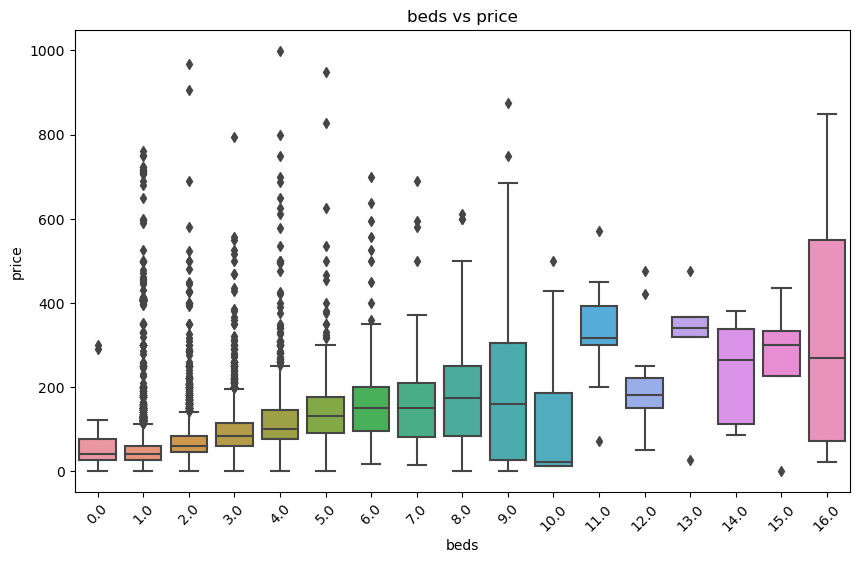

In [23]:
analyze_column(df['beds'], target_column=df['price'])

Distinct values: 32


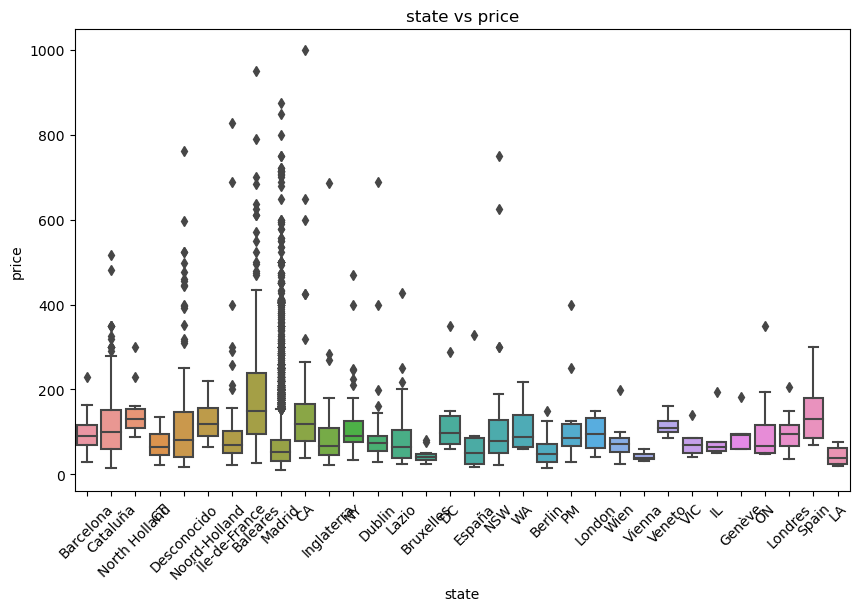

In [44]:
analyze_column(df['state'], target_column=df['price'])

Distinct values: 3


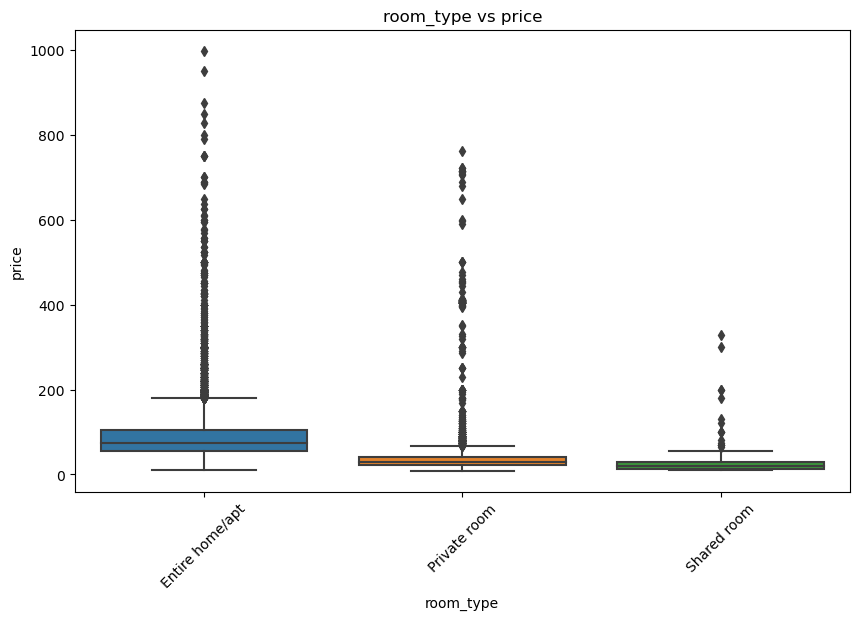

In [45]:
analyze_column(df['room_type'], target_column=df['price'])

In [26]:
df_dummies = pd.get_dummies(df)

## Modelo

In [84]:
X = df_dummies.drop('price', axis=1) 
y = df_dummies['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
boost = GradientBoostingRegressor()
boost.fit(X_train, y_train)
pred_y = boost.predict(X_test)

score_train_XGB = boost.score(X_train, y_train)
score_train_XGB

Score en los datos de train: 0.7276695202702805
Mean Squared Error (MSE) en los datos de test: 551.2160814271953
Mean Absolute Error (MAE) en los datos de test: 15.505151974048287
Coeficiente de determinación R² en los datos de test: 0.6959785518508667


In [ ]:
r2_score(y_test, pred_y)

In [85]:
# Visualizamos en la siguiente tabla la precisión del modelo sobre una muestra de 30 alojamientos en el df test
df_y_test = pd.DataFrame(y_test)
df_y_test["predicted_price"] = pred_y
df_y_test.head(30)

,price,predicted_price
3063,160.0,186.687270
9857,69.0,73.255132
8587,100.0,98.037838
13192,50.0,42.047666
900,35.0,52.369194
4404,20.0,27.419542
6824,17.0,22.495221
9136,55.0,56.859724
4843,21.0,38.031523
11836,60.0,61.879129


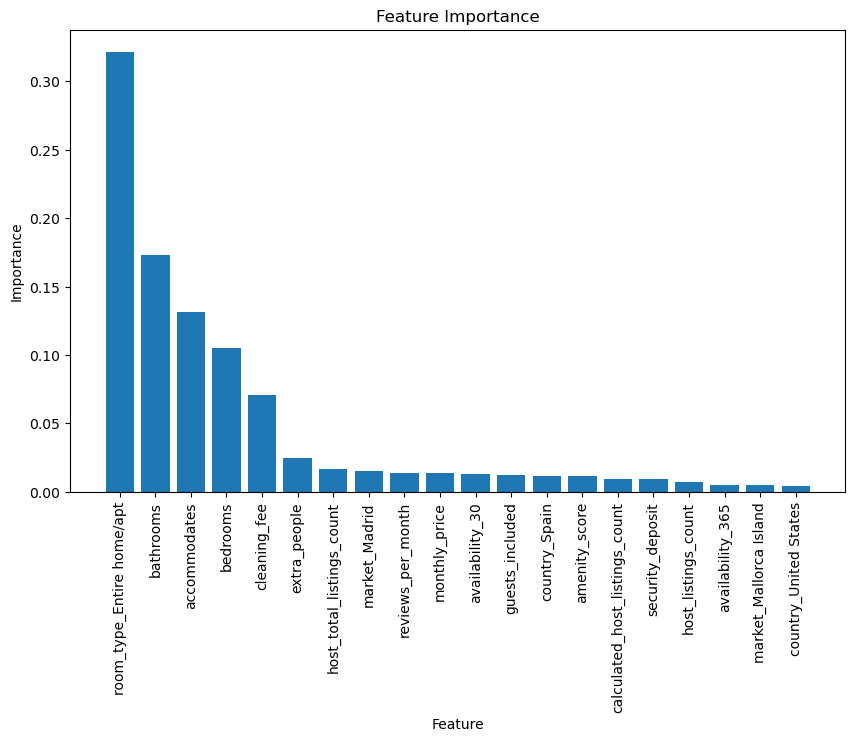

In [86]:
importances = boost.feature_importances_
feature_names = X.columns

# Ordenar las importancias y los nombres de las variables de manera descendente
indices = np.argsort(importances)[::-1]
sorted_importances = importances[indices]
sorted_feature_names = feature_names[indices]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances[:20])), sorted_importances[:20])
plt.xticks(range(len(importances[:20])), sorted_feature_names[:20], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# Decision Tree

In [94]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=40, max_depth=5) 
regressor.fit(X_train, y_train)

pred_y = regressor.predict(X_test)

score_train_DT = regressor.score(X_train, y_train)
score_train_DT

Score en los datos de train: 0.624230533959378
Mean Squared Error (MSE) en los datos de test: 754.4519860517531
Mean Absolute Error (MAE) en los datos de test: 18.338705432913844
Coeficiente de determinación R² en los datos de test: 0.583884445525309


In [ ]:
r2_DT = r2_score(y_test, regressor_pred_y)
r2_DT

In [95]:
# Visualizamos en la siguiente tabla la precisión del modelo de arboles de Regression sobre una muestra de 20 alojamientos en el df test
df_y_test = pd.DataFrame(y_test)
df_y_test["predicted_price"] = pred_y
df_y_test.head(20)

,price,predicted_price
3063,160.0,186.842857
9857,69.0,71.279564
8587,100.0,71.279564
13192,50.0,25.384814
900,35.0,71.279564
4404,20.0,25.384814
6824,17.0,25.384814
9136,55.0,60.833982
4843,21.0,39.751220
11836,60.0,71.279564


# Redes Neuronales

In [99]:
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', 
                         alpha=0.2, batch_size='auto', learning_rate='constant', 
                         learning_rate_init=0.002, max_iter=150, random_state=42)

# Entrenar el modelo
regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
pred_y = regressor.predict(X_test)

score_train_NT = regressor.score(X_train, y_train)
score_train_NT


Score en los datos de train: 0.9917798882535727
Mean Squared Error (MSE) en los datos de test: 19506.52130333059
Mean Absolute Error (MAE) en los datos de test: 6.647129691849207
Coeficiente de determinación R² en los datos de test: -9.75875877865471


Hemos creado dos modelos, uno de redes neuronales y otro de arboles de decision. El modelo que mejor resultado nos da es el de arboles de decision ya que el de redes neuronales tiene overfitting. Por lo tanto a la hora de calcular el precio de un airbnb nuevo, lo estimariamos con el modelo de arboles de decisión.